# Question 1:



In [166]:
import numpy as np
import math
import scipy
from scipy import linalg

In [156]:
password = np.array([1,0,1,1,1])
c1 = np.array([0,1,0,1,1])
c2 = np.array([1,1,1,1,0])

beta1 = (np.dot(password, c1))%2
beta2 = (np.dot(password, c2))%2

print("first reply is {}".format(beta1))
print("second reply is {}".format(beta2))

first reply is 0
second reply is 1


# Question 2:



since beta1 = 01011.x and beta2 = 11110.x,
(01011 + 1110).x = (01011.x) + (11110.x)
                 = beta1 + beta2
                 = 1

In [157]:
(beta1 + beta2)%2

1

# Question 3:



In [158]:
Ch = np.array([[1,1,0,0,1,1,0],
               [1,0,1,0,1,0,0],
               [1,1,1,0,1,1,1],
               [0,0,1,1,0,0,1]])
print(Ch)

[[1 1 0 0 1 1 0]
 [1 0 1 0 1 0 0]
 [1 1 1 0 1 1 1]
 [0 0 1 1 0 0 1]]


In [159]:
#modify array Ch

In [160]:
Ch[2]=(Ch[0]+Ch[2])%2
print(Ch)
Ch[3]=(Ch[2]+Ch[3])%2
print(Ch)
Ch[0]=(Ch[0]+Ch[1]+Ch[2])%2
print(Ch)
Ch[1]=(Ch[1]+Ch[2])%2

[[1 1 0 0 1 1 0]
 [1 0 1 0 1 0 0]
 [0 0 1 0 0 0 1]
 [0 0 1 1 0 0 1]]
[[1 1 0 0 1 1 0]
 [1 0 1 0 1 0 0]
 [0 0 1 0 0 0 1]
 [0 0 0 1 0 0 0]]
[[0 1 0 0 0 1 1]
 [1 0 1 0 1 0 0]
 [0 0 1 0 0 0 1]
 [0 0 0 1 0 0 0]]


In [161]:
Ch

array([[0, 1, 0, 0, 0, 1, 1],
       [1, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0]])

In [162]:
def response(Ch, c):
    #if challenged 011001
    if c == "011001":
        result = ((Ch[0]+Ch[2]))%2
        #Ch[0] + Ch[2] = 0110010
        return result[6]
    #if challenge 110111
    elif c == "110111":
        result = ((Ch[1]+Ch[0]+Ch[3]))%2
        #Ch[1]+Ch[0]+Ch[3] = 1101110
        return result[6]

In [163]:
response(Ch, "110111")

0

# Question 4:



In [183]:
#for eqn 1 to have solution, number of eqns m, in matrix, 
#must be greater or equal to length of challenge. 

Ch2 = np.array([[1,1,0,0,1,1],
                [1,0,1,0,1,0],
                [1,1,1,0,1,1],
                [0,0,1,1,0,0],
                [0,1,1,0,1,1],
                [1,1,0,1,0,0]])
Ch3 = np.array([0,0,1,1,0,1])
#Ch3 = Ch3.T
#Ch3         

In [184]:
(scipy.linalg.solve(Ch2, Ch3))%2

array([1., 0., 1., 0., 0., 1.])

# Question 5:

In [244]:
x = np.array([0.846,1.324,1.150,3.037,3.984])
y = np.array([115.00,234.50,198.00,528.00,572.50])
n = len(x)
sumx = np.sum(x)
sumy = np.sum(y)
sumx2 = np.sum(x*x)
sumxy = np.sum(x*y)
#let A be augmented matrix
A = np.array([[sumx2, sumx, sumxy],
             [sumx, n, sumy]])
b = np.array([[sumxy],[sumy]])
print(A)
print(b)


[[  28.886817   10.341    4519.844   ]
 [  10.341       5.       1648.      ]]
[[4519.844]
 [1648.   ]]


In [245]:
#perform elementary row operations on matrix A until row echelon form
A[0] = A[0]/A[0][0]
A[1] = A[1]/A[1][0] - A[0]
A[1] = A[1]/A[1][1]
A[0] = A[0]-(A[1]*A[0][1])
A

array([[  1.        ,   0.        , 148.20206538],
       [  0.        ,   1.        ,  23.08848838]])

In [250]:
m = A[0,2]
c = A[1,2]
print("m is {}".format(A[0,2]))
print("c is {}".format(A[1,2]))

m is 148.2020653796153
c is 23.08848838187969


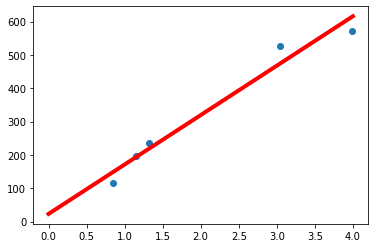

In [252]:
import matplotlib.pyplot as plt
xs = np.linspace(0,4,5)
ys = c + m*xs
plt.plot(xs,ys,'r',linewidth=4)
plt.scatter(x,y)
plt.show()

# Question 6:

In [289]:
from mpl_toolkits import mplot3d

In [290]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [302]:
sumX = np.array([[1,0.846,1],
                [1,1.324,2],
                [1,1.150,3],
                [1,3.037,4],
                [1,3.984,5]])
sumXT = np.transpose(sumX)
sumY = np.array([115.00,234.50,198.00,528.00,572.50])
a = scipy.linalg.solve((sumXT@sumX), (sumXT@sumY))
print("a is {}".format(a))

a is [  9.97566234 130.67172705  16.45635726]


[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]
[[1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4.]
 [5. 5. 5. 5. 5.]]
[[ 26.4320196  157.10374665 287.77547369 418.44720074 549.11892779]
 [ 42.88837686 173.56010391 304.23183096 434.903558   565.57528505]
 [ 59.34473412 190.01646117 320.68818822 451.35991526 582.03164231]
 [ 75.80109138 206.47281843 337.14454548 467.81627252 598.48799957]
 [ 92.25744864 222.92917569 353.60090274 484.27262979 614.94435683]]


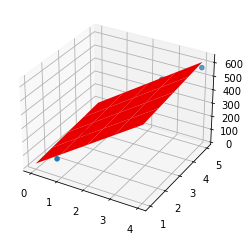

In [315]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(sumXT[1], sumXT[2], sumY)
X = np.linspace(0, 4, 5)
Y = np.linspace(1, 5, 5)
X, Y = np.meshgrid(X, Y)

def f(X, Y):
    out = a[0] + ((a[1]) * (X)) + ((a[2]) * (Y)) 
    return out

Z = f(X, Y)
print(X)
print(Y)
print(Z)
ax.plot_surface(X, Y, Z, color='red')

In [321]:
for house in sumX:
    area = house[1]
    rooms = house[2]
    price = a[0] + ((a[1]) * (area)) + ((a[2]) * (rooms))
    print("house no.{} expected price is {}".format(int(rooms), price))
    

house no.1 expected price is 136.98030067975762
house no.2 expected price is 215.89774346960272
house no.3 expected price is 209.61722022323426
house no.4 expected price is 472.6511264256942
house no.5 expected price is 612.8536092017113
